In [15]:
%load_ext autoreload
%autoreload 2
import os, sys
sys.path.append('..')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster")
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (11,8)
from merf.merf import MERF
from sklearn.model_selection import train_test_split, KFold
from merf.evaluator import plot_bhat, plot_training_stats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Sleep Study

We evaluate the performance of MERF on a famous sleep study dataset with 180 samples and 18 clusters (with 10 samples each). 

In [2]:
sleep_df = pd.read_csv('../data/sleepstudy.csv')

Text(0,0.5,'Reaction')

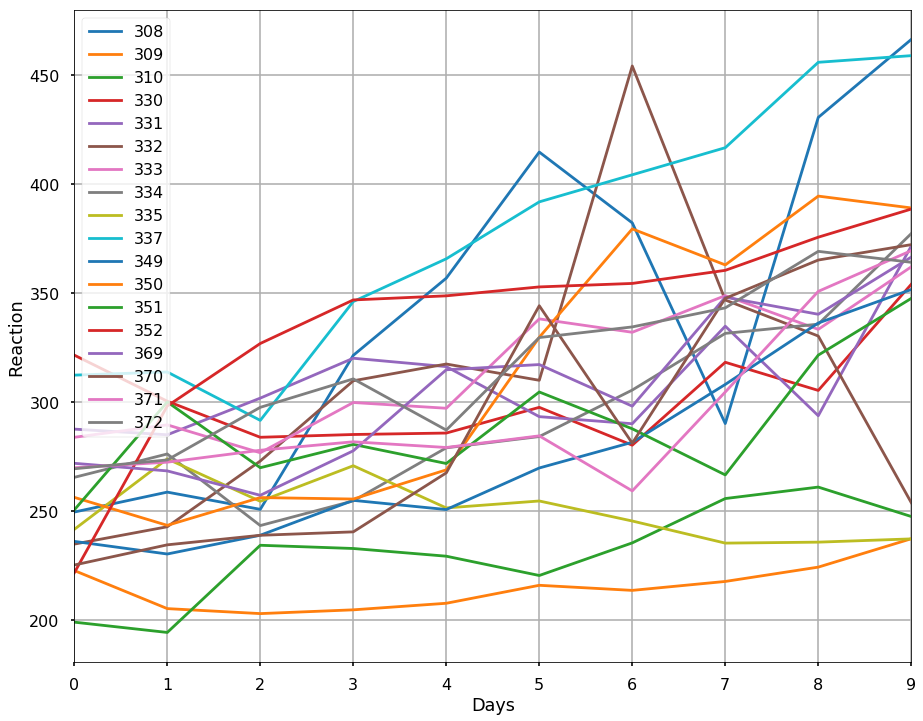

In [3]:
fig, ax = plt.subplots(figsize=(15,12))
for label, group in sleep_df.groupby('Subject'):
    group.plot(x='Days', y='Reaction', ax=ax, label=label)
plt.legend()
plt.grid('on')
plt.ylabel('Reaction')

In [4]:
sleep_df.head()

,Unnamed: 0,Reaction,Days,Subject
0,1,249.5600,0,308
1,2,258.7047,1,308
2,3,250.8006,2,308
3,4,321.4398,3,308
4,5,356.8519,4,308


INFO     [merf.py:235] GLL is 1428.749557088927 at iteration 1.
INFO     [merf.py:235] GLL is 1425.5519247941138 at iteration 2.
INFO     [merf.py:235] GLL is 1427.5016491580543 at iteration 3.
INFO     [merf.py:235] GLL is 1426.223170709782 at iteration 4.
INFO     [merf.py:235] GLL is 1426.8582308869234 at iteration 5.
INFO     [merf.py:235] GLL is 1425.3316283769757 at iteration 6.
INFO     [merf.py:235] GLL is 1426.213538434854 at iteration 7.
INFO     [merf.py:235] GLL is 1427.1921105283773 at iteration 8.
INFO     [merf.py:235] GLL is 1427.2937595034323 at iteration 9.
INFO     [merf.py:235] GLL is 1426.158543998992 at iteration 10.
INFO     [merf.py:235] GLL is 1426.6317845949256 at iteration 11.
INFO     [merf.py:235] GLL is 1426.189895300844 at iteration 12.
INFO     [merf.py:235] GLL is 1427.3712529491766 at iteration 13.
INFO     [merf.py:235] GLL is 1425.8500253947238 at iteration 14.
INFO     [merf.py:235] GLL is 1425.7749213064371 at iteration 15.
INFO     [merf.py:235] G

Text(0.5,1,'MSE RF = 9.011, MSE MERF = 6.332')

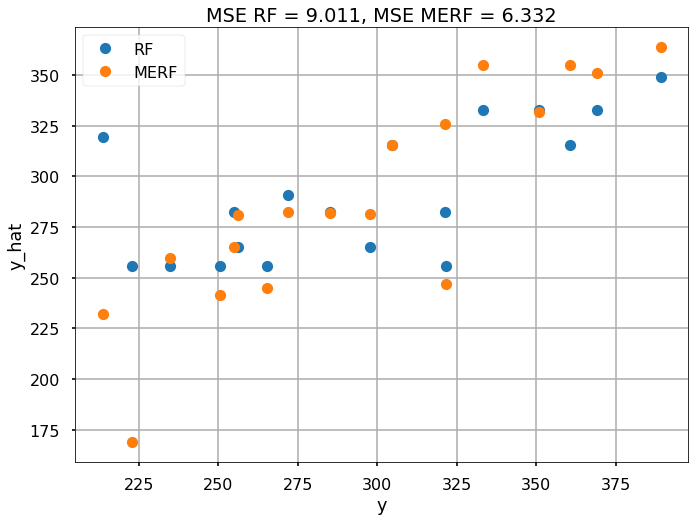

In [5]:
train, test = train_test_split(sleep_df, test_size=0.1, shuffle=True)
y = test['Reaction']

# Random Forest Training and Prediction
rf = RandomForestRegressor(n_estimators=100)
rf.fit(train[['Days']], train['Reaction'])
yhat_rf = rf.predict(test[['Days']])

# Mixed Effects Random Forest Training
mrf = MERF(n_estimators=100, max_iterations=20)
X_train =  train[['Days']]
Z_train = np.ones((len(X_train), 1))
clusters_train = train['Subject']
y_train = train['Reaction']
mrf.fit(X_train, Z_train, clusters_train, y_train)

# Mixed Effects Random Forest Test
X_test =  test[['Days']]
Z_test = np.ones((len(X_test), 1))
clusters_test = test['Subject']
yhat_mrf = mrf.predict(X_test, Z_test, clusters_test)

# Compute MSE
mse_rf = np.sqrt(np.sum((y - yhat_rf)**2)) / len(y)
mse_mrf = np.sqrt(np.sum((y - yhat_mrf)**2)) / len(y)

# Plot Scatter Plot of error
plt.plot(y, yhat_rf, 'o', label='RF')
plt.plot(y, yhat_mrf, 'o', label='MERF')
plt.grid('on')
plt.xlabel('y')
plt.ylabel('y_hat')

plt.legend()
plt.title('MSE RF = {:.3f}, MSE MERF = {:.3f}'.format(mse_rf, mse_mrf))

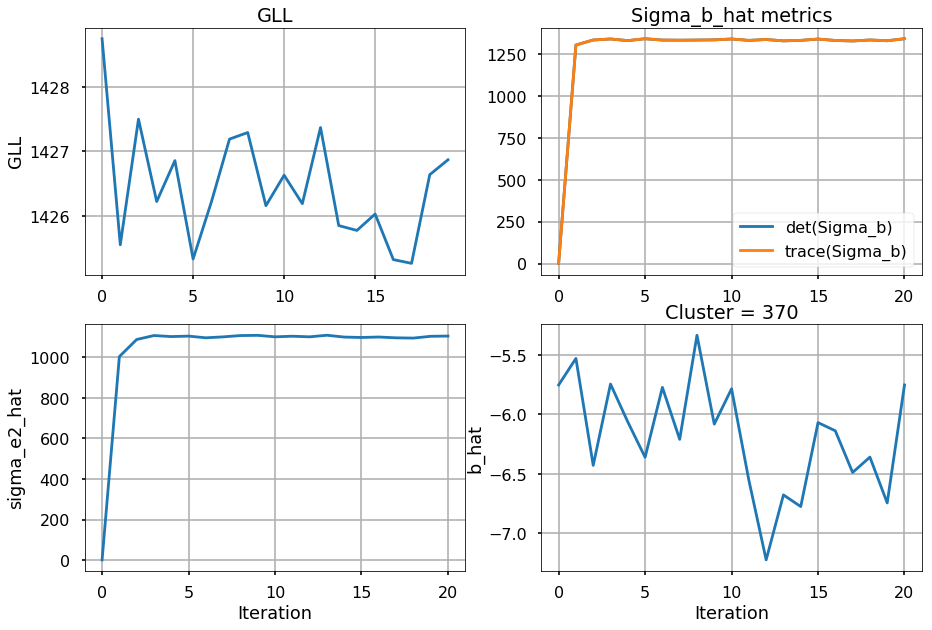

In [6]:
plot_training_stats(mrf)

/Users/souravdey/.virtualenvs/merf/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  """Entry point for launching an IPython kernel.


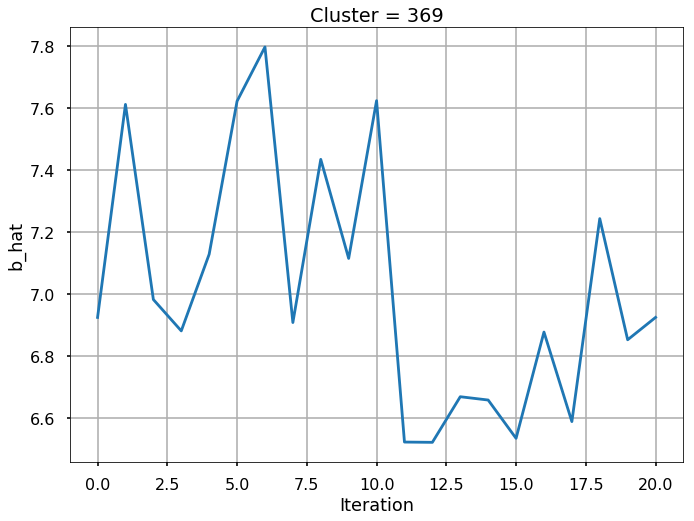

In [10]:
bb = plot_bhat(mrf, 2)

# Radon

We evaluate the performance of MERF on the famous Minnesota radon dataset. 

In [3]:
radon_df = pd.read_csv('../data/radon.csv')

In [4]:
radon_df.head()

,Unnamed: 0,idnum,state,state2,stfips,zip,region,typebldg,floor,room,...,pcterr,adjwt,dupflag,zipflag,cntyfips,county,fips,Uppm,county_code,log_radon
0,0,5081.0,MN,MN,27.0,55735,5.0,1.0,1.0,3.0,...,9.7,1146.499190,1.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
1,1,5082.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,...,14.5,471.366223,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
2,2,5083.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,...,9.6,433.316718,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,1.098612
3,3,5084.0,MN,MN,27.0,56469,5.0,1.0,0.0,4.0,...,24.3,461.623670,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.095310
4,4,5085.0,MN,MN,27.0,55011,3.0,1.0,0.0,4.0,...,13.8,433.316718,0.0,0.0,3.0,ANOKA,27003.0,0.428565,1,1.163151


In [5]:
radon_df[['floor', 'Uppm', 'county', 'log_radon']].head()

,floor,Uppm,county,log_radon
0,1.0,0.502054,AITKIN,0.832909
1,0.0,0.502054,AITKIN,0.832909
2,0.0,0.502054,AITKIN,1.098612
3,0.0,0.502054,AITKIN,0.095310
4,0.0,0.428565,ANOKA,1.163151


In [40]:
max_iter = 200
cv = KFold(n_splits=5, shuffle=True)
mse_rf = []
mse_rfplus = []
mse_mrf = []
mse_mrf_uranium = []
mse_mrf_uranium_both = []

for train_idx, test_idx in cv.split(radon_df):
    # actually split the data
    train = radon_df.iloc[train_idx]
    test = radon_df.iloc[test_idx]
    # ground truth
    y = test['log_radon']
    
    # Random Forest Training and test prediction
    rf = RandomForestRegressor(n_estimators=100)
    rf.fit(train[['floor']], train['log_radon'])
    yhat_rf = rf.predict(test[['floor']])
    mse_rf.append(np.sqrt(np.sum((y - yhat_rf)**2)) / len(y))
    
    # Random Forest Training with Uranium as fixed effect covariate
    rfplus = RandomForestRegressor(n_estimators=100)
    rfplus.fit(train[['floor', 'Uppm']], train['log_radon'])
    yhat_rfplus = rfplus.predict(test[['floor', 'Uppm']])
    mse_rfplus.append(np.sqrt(np.sum((y - yhat_rfplus)**2)) / len(y))
    
    # Mixed Effects Random Forest Training
    mrf = MERF(n_estimators=100, max_iterations=max_iter)
    X_train =  train[['floor']]
    Z_train = np.ones((len(X_train), 1))
    clusters_train = train['county']
    y_train = train['log_radon']
    mrf.fit(X_train, Z_train, clusters_train, y_train)

    # Mixed Effects Random Forest Test
    X_test =  test[['floor']]
    Z_test = np.ones((len(X_test), 1))
    clusters_test = test['county']
    yhat_mrf = mrf.predict(X_test, Z_test, clusters_test)
    mse_mrf.append(np.sqrt(np.sum((y - yhat_mrf)**2)) / len(y))
    
    # Mixed Effects Random Forest Training with uranium RE
    mrf_uranium = MERF(n_estimators=100, max_iterations=max_iter)
    X_train =  train[['floor']]
    Z_train = np.array((np.ones(len(X_train)), train['Uppm'])).T
    clusters_train = train['county']
    y_train = train['log_radon']
    mrf_uranium.fit(X_train, Z_train, clusters_train, y_train)

    # Mixed Effects Random Forest Test with uranium RE
    X_test =  test[['floor']]
    Z_test = np.array((np.ones(len(X_test)), test['Uppm'])).T
    clusters_test = test['county']
    yhat_mrf_uranium = mrf_uranium.predict(X_test, Z_test, clusters_test)
    mse_mrf_uranium.append(np.sqrt(np.sum((y - yhat_mrf_uranium)**2)) / len(y))
    
    # Mixed Effects Random Forest Training with Uranium as both FE and RE
    mrf_uranium_both = MERF(n_estimators=100, max_iterations=max_iter)
    X_train =  train[['floor', 'Uppm']]
    Z_train = np.array((np.ones(len(X_train)), train['Uppm'])).T
    clusters_train = train['county']
    y_train = train['log_radon']
    mrf_uranium_both.fit(X_train, Z_train, clusters_train, y_train)

    # Mixed Effects Random Forest Test with County-level covariate (uranium)
    X_test =  test[['floor', 'Uppm']]
    Z_test = np.array((np.ones(len(X_test)), test['Uppm'])).T
    clusters_test = test['county']
    yhat_mrf_uranium_both = mrf_uranium_both.predict(X_test, Z_test, clusters_test)
    mse_mrf_uranium_both.append(np.sqrt(np.sum((y - yhat_mrf_uranium_both)**2)) / len(y))


INFO     [merf.py:235] GLL is 134.74391444720203 at iteration 1.
INFO     [merf.py:235] GLL is 101.62647482419622 at iteration 2.
INFO     [merf.py:235] GLL is 86.76486119742471 at iteration 3.
INFO     [merf.py:235] GLL is 76.83369651625095 at iteration 4.
INFO     [merf.py:235] GLL is 71.01663279541303 at iteration 5.
INFO     [merf.py:235] GLL is 67.28774674240496 at iteration 6.
INFO     [merf.py:235] GLL is 63.99884031093674 at iteration 7.
INFO     [merf.py:235] GLL is 61.90275726198231 at iteration 8.
INFO     [merf.py:235] GLL is 61.89554826444283 at iteration 9.
INFO     [merf.py:235] GLL is 60.42823005522482 at iteration 10.
INFO     [merf.py:235] GLL is 59.570473885472 at iteration 11.
INFO     [merf.py:235] GLL is 59.50955274178868 at iteration 12.
INFO     [merf.py:235] GLL is 59.420642663633394 at iteration 13.
INFO     [merf.py:235] GLL is 60.41119865502283 at iteration 14.
INFO     [merf.py:235] GLL is 59.98162641027855 at iteration 15.
INFO     [merf.py:235] GLL is 59.

INFO     [merf.py:235] GLL is 59.49959855875988 at iteration 127.
INFO     [merf.py:235] GLL is 58.08230211374923 at iteration 128.
INFO     [merf.py:235] GLL is 58.58220213676752 at iteration 129.
INFO     [merf.py:235] GLL is 58.41698403478917 at iteration 130.
INFO     [merf.py:235] GLL is 59.23609426101609 at iteration 131.
INFO     [merf.py:235] GLL is 59.2767597769812 at iteration 132.
INFO     [merf.py:235] GLL is 58.92415979521899 at iteration 133.
INFO     [merf.py:235] GLL is 58.34826449448961 at iteration 134.
INFO     [merf.py:235] GLL is 57.9862059403025 at iteration 135.
INFO     [merf.py:235] GLL is 58.460737842034156 at iteration 136.
INFO     [merf.py:235] GLL is 59.07546743227393 at iteration 137.
INFO     [merf.py:235] GLL is 59.01807581558799 at iteration 138.
INFO     [merf.py:235] GLL is 58.879812055887705 at iteration 139.
INFO     [merf.py:235] GLL is 58.81014178380798 at iteration 140.
INFO     [merf.py:235] GLL is 58.44284378226492 at iteration 141.
INFO     [

INFO     [merf.py:235] GLL is -87.16641338123898 at iteration 52.
INFO     [merf.py:235] GLL is -87.21047409673206 at iteration 53.
INFO     [merf.py:235] GLL is -86.66960527289204 at iteration 54.
INFO     [merf.py:235] GLL is -87.64778723567838 at iteration 55.
INFO     [merf.py:235] GLL is -89.26916870682189 at iteration 56.
INFO     [merf.py:235] GLL is -89.43391919017023 at iteration 57.
INFO     [merf.py:235] GLL is -89.41344412041357 at iteration 58.
INFO     [merf.py:235] GLL is -90.58199443007149 at iteration 59.
INFO     [merf.py:235] GLL is -90.22296729775827 at iteration 60.
INFO     [merf.py:235] GLL is -91.3199074080207 at iteration 61.
INFO     [merf.py:235] GLL is -92.65466315615403 at iteration 62.
INFO     [merf.py:235] GLL is -92.3164724388805 at iteration 63.
INFO     [merf.py:235] GLL is -92.99762305326219 at iteration 64.
INFO     [merf.py:235] GLL is -93.61920465126501 at iteration 65.
INFO     [merf.py:235] GLL is -94.28320804776313 at iteration 66.
INFO     [me

INFO     [merf.py:235] GLL is -136.5456702233319 at iteration 174.
INFO     [merf.py:235] GLL is -136.3805981973889 at iteration 175.
INFO     [merf.py:235] GLL is -137.07042630808306 at iteration 176.
INFO     [merf.py:235] GLL is -136.73818536829634 at iteration 177.
INFO     [merf.py:235] GLL is -138.608920823393 at iteration 178.
INFO     [merf.py:235] GLL is -137.81309315449963 at iteration 179.
INFO     [merf.py:235] GLL is -137.46544405736017 at iteration 180.
INFO     [merf.py:235] GLL is -138.6948641927267 at iteration 181.
INFO     [merf.py:235] GLL is -137.84564872001937 at iteration 182.
INFO     [merf.py:235] GLL is -138.632030412269 at iteration 183.
INFO     [merf.py:235] GLL is -139.5683066662242 at iteration 184.
INFO     [merf.py:235] GLL is -139.42846164893956 at iteration 185.
INFO     [merf.py:235] GLL is -138.7401179897672 at iteration 186.
INFO     [merf.py:235] GLL is -139.78365873604082 at iteration 187.
INFO     [merf.py:235] GLL is -140.03319363979506 at iter

INFO     [merf.py:235] GLL is -571.5779637571897 at iteration 98.
INFO     [merf.py:235] GLL is -581.6660277457671 at iteration 99.
INFO     [merf.py:235] GLL is -587.7023277230153 at iteration 100.
INFO     [merf.py:235] GLL is -577.4487515490816 at iteration 101.
INFO     [merf.py:235] GLL is -597.0585768354123 at iteration 102.
INFO     [merf.py:235] GLL is -586.4285574547278 at iteration 103.
INFO     [merf.py:235] GLL is -596.786113188159 at iteration 104.
INFO     [merf.py:235] GLL is -595.6225214606086 at iteration 105.
INFO     [merf.py:235] GLL is -576.70424829371 at iteration 106.
INFO     [merf.py:235] GLL is -588.7824977672913 at iteration 107.
INFO     [merf.py:235] GLL is -598.3654966578166 at iteration 108.
INFO     [merf.py:235] GLL is -599.68147839091 at iteration 109.
INFO     [merf.py:235] GLL is -593.6611028866367 at iteration 110.
INFO     [merf.py:235] GLL is -602.3737656453605 at iteration 111.
INFO     [merf.py:235] GLL is -610.5730164301661 at iteration 112.
IN

INFO     [merf.py:235] GLL is 130.0154683621878 at iteration 22.
INFO     [merf.py:235] GLL is 129.51833655807536 at iteration 23.
INFO     [merf.py:235] GLL is 129.25272179291076 at iteration 24.
INFO     [merf.py:235] GLL is 129.6896963991615 at iteration 25.
INFO     [merf.py:235] GLL is 129.51884675061862 at iteration 26.
INFO     [merf.py:235] GLL is 129.67822276613367 at iteration 27.
INFO     [merf.py:235] GLL is 129.43026810911033 at iteration 28.
INFO     [merf.py:235] GLL is 128.89145034485549 at iteration 29.
INFO     [merf.py:235] GLL is 128.99055725531684 at iteration 30.
INFO     [merf.py:235] GLL is 129.07146864261554 at iteration 31.
INFO     [merf.py:235] GLL is 130.95937865269036 at iteration 32.
INFO     [merf.py:235] GLL is 129.7219432603059 at iteration 33.
INFO     [merf.py:235] GLL is 129.77218188525515 at iteration 34.
INFO     [merf.py:235] GLL is 129.5166911205785 at iteration 35.
INFO     [merf.py:235] GLL is 128.75366173264402 at iteration 36.
INFO     [merf

INFO     [merf.py:235] GLL is 129.79665737344695 at iteration 147.
INFO     [merf.py:235] GLL is 129.63327915894914 at iteration 148.
INFO     [merf.py:235] GLL is 129.4332281696618 at iteration 149.
INFO     [merf.py:235] GLL is 129.22010905944845 at iteration 150.
INFO     [merf.py:235] GLL is 130.13909350406666 at iteration 151.
INFO     [merf.py:235] GLL is 128.95719817680586 at iteration 152.
INFO     [merf.py:235] GLL is 128.5307973974876 at iteration 153.
INFO     [merf.py:235] GLL is 129.27964080214423 at iteration 154.
INFO     [merf.py:235] GLL is 129.66632931941766 at iteration 155.
INFO     [merf.py:235] GLL is 130.5954011231111 at iteration 156.
INFO     [merf.py:235] GLL is 128.56436440167414 at iteration 157.
INFO     [merf.py:235] GLL is 129.60540422934403 at iteration 158.
INFO     [merf.py:235] GLL is 128.51538473049504 at iteration 159.
INFO     [merf.py:235] GLL is 128.17986111930347 at iteration 160.
INFO     [merf.py:235] GLL is 129.10194377395842 at iteration 161

INFO     [merf.py:235] GLL is -12.100511482018897 at iteration 71.
INFO     [merf.py:235] GLL is -12.773534233193878 at iteration 72.
INFO     [merf.py:235] GLL is -11.611274576801065 at iteration 73.
INFO     [merf.py:235] GLL is -11.507394015096994 at iteration 74.
INFO     [merf.py:235] GLL is -11.66154863832029 at iteration 75.
INFO     [merf.py:235] GLL is -10.430786640874679 at iteration 76.
INFO     [merf.py:235] GLL is -11.090497834793691 at iteration 77.
INFO     [merf.py:235] GLL is -12.632084576809216 at iteration 78.
INFO     [merf.py:235] GLL is -11.672340614398038 at iteration 79.
INFO     [merf.py:235] GLL is -12.565133304228675 at iteration 80.
INFO     [merf.py:235] GLL is -12.799301595131304 at iteration 81.
INFO     [merf.py:235] GLL is -12.953249277269684 at iteration 82.
INFO     [merf.py:235] GLL is -13.828887249115095 at iteration 83.
INFO     [merf.py:235] GLL is -13.442158002063678 at iteration 84.
INFO     [merf.py:235] GLL is -13.151761541849812 at iteration 

INFO     [merf.py:235] GLL is -40.805031251675885 at iteration 193.
INFO     [merf.py:235] GLL is -40.48656080276314 at iteration 194.
INFO     [merf.py:235] GLL is -41.936647096923714 at iteration 195.
INFO     [merf.py:235] GLL is -42.621717838737595 at iteration 196.
INFO     [merf.py:235] GLL is -42.1247080365721 at iteration 197.
INFO     [merf.py:235] GLL is -42.32722320161135 at iteration 198.
INFO     [merf.py:235] GLL is -42.50681912740265 at iteration 199.
INFO     [merf.py:235] GLL is -43.216958271633885 at iteration 200.
INFO     [merf.py:235] GLL is 303.57966395635634 at iteration 1.
INFO     [merf.py:235] GLL is 218.891926992845 at iteration 2.
INFO     [merf.py:235] GLL is 168.9343763816022 at iteration 3.
INFO     [merf.py:235] GLL is 131.44122375001152 at iteration 4.
INFO     [merf.py:235] GLL is 103.11588008933383 at iteration 5.
INFO     [merf.py:235] GLL is 86.095003669665 at iteration 6.
INFO     [merf.py:235] GLL is 58.058593110720054 at iteration 7.
INFO     [me

INFO     [merf.py:235] GLL is -502.9069312269305 at iteration 117.
INFO     [merf.py:235] GLL is -510.44921109261196 at iteration 118.
INFO     [merf.py:235] GLL is -498.02466050277593 at iteration 119.
INFO     [merf.py:235] GLL is -515.3872823463493 at iteration 120.
INFO     [merf.py:235] GLL is -516.1270206245733 at iteration 121.
INFO     [merf.py:235] GLL is -504.2258961799611 at iteration 122.
INFO     [merf.py:235] GLL is -509.0556563953612 at iteration 123.
INFO     [merf.py:235] GLL is -510.28053986955695 at iteration 124.
INFO     [merf.py:235] GLL is -504.2509937256924 at iteration 125.
INFO     [merf.py:235] GLL is -526.0468355009922 at iteration 126.
INFO     [merf.py:235] GLL is -528.6379955093796 at iteration 127.
INFO     [merf.py:235] GLL is -525.2279814458392 at iteration 128.
INFO     [merf.py:235] GLL is -501.7538252474361 at iteration 129.
INFO     [merf.py:235] GLL is -520.4991512763589 at iteration 130.
INFO     [merf.py:235] GLL is -517.1105840127789 at iterati

INFO     [merf.py:235] GLL is 66.46892840271737 at iteration 41.
INFO     [merf.py:235] GLL is 66.24210189958953 at iteration 42.
INFO     [merf.py:235] GLL is 66.55922463454206 at iteration 43.
INFO     [merf.py:235] GLL is 66.60355169705281 at iteration 44.
INFO     [merf.py:235] GLL is 66.82667752100171 at iteration 45.
INFO     [merf.py:235] GLL is 65.81955845142282 at iteration 46.
INFO     [merf.py:235] GLL is 66.2821992100752 at iteration 47.
INFO     [merf.py:235] GLL is 65.9266721774854 at iteration 48.
INFO     [merf.py:235] GLL is 66.14655349025564 at iteration 49.
INFO     [merf.py:235] GLL is 66.25448089913793 at iteration 50.
INFO     [merf.py:235] GLL is 67.69807398448607 at iteration 51.
INFO     [merf.py:235] GLL is 66.27181995220279 at iteration 52.
INFO     [merf.py:235] GLL is 65.96033642144977 at iteration 53.
INFO     [merf.py:235] GLL is 65.3963350307354 at iteration 54.
INFO     [merf.py:235] GLL is 66.46646381280303 at iteration 55.
INFO     [merf.py:235] GLL i

INFO     [merf.py:235] GLL is 66.43615812650893 at iteration 167.
INFO     [merf.py:235] GLL is 66.71729165976629 at iteration 168.
INFO     [merf.py:235] GLL is 66.93130019733084 at iteration 169.
INFO     [merf.py:235] GLL is 66.21856255168748 at iteration 170.
INFO     [merf.py:235] GLL is 67.17223123389962 at iteration 171.
INFO     [merf.py:235] GLL is 66.16630060293384 at iteration 172.
INFO     [merf.py:235] GLL is 66.43133712475066 at iteration 173.
INFO     [merf.py:235] GLL is 66.81524700671797 at iteration 174.
INFO     [merf.py:235] GLL is 66.20199666919702 at iteration 175.
INFO     [merf.py:235] GLL is 66.52653468723122 at iteration 176.
INFO     [merf.py:235] GLL is 66.40282918732427 at iteration 177.
INFO     [merf.py:235] GLL is 67.4873299690281 at iteration 178.
INFO     [merf.py:235] GLL is 66.20362436074525 at iteration 179.
INFO     [merf.py:235] GLL is 66.84875092569011 at iteration 180.
INFO     [merf.py:235] GLL is 64.97453626660153 at iteration 181.
INFO     [m

INFO     [merf.py:235] GLL is -125.05124739125021 at iteration 92.
INFO     [merf.py:235] GLL is -125.54427831921984 at iteration 93.
INFO     [merf.py:235] GLL is -125.96377987804443 at iteration 94.
INFO     [merf.py:235] GLL is -128.12041490252136 at iteration 95.
INFO     [merf.py:235] GLL is -128.7131614029189 at iteration 96.
INFO     [merf.py:235] GLL is -129.260346923165 at iteration 97.
INFO     [merf.py:235] GLL is -129.9192814839091 at iteration 98.
INFO     [merf.py:235] GLL is -130.10509748787806 at iteration 99.
INFO     [merf.py:235] GLL is -131.36783688838986 at iteration 100.
INFO     [merf.py:235] GLL is -132.01762592648353 at iteration 101.
INFO     [merf.py:235] GLL is -132.81445154159758 at iteration 102.
INFO     [merf.py:235] GLL is -134.25038777604462 at iteration 103.
INFO     [merf.py:235] GLL is -133.70795323992746 at iteration 104.
INFO     [merf.py:235] GLL is -134.62713303971876 at iteration 105.
INFO     [merf.py:235] GLL is -135.7445341478531 at iteratio

INFO     [merf.py:235] GLL is -127.12468268432823 at iteration 14.
INFO     [merf.py:235] GLL is -141.0244529128971 at iteration 15.
INFO     [merf.py:235] GLL is -147.08143736073038 at iteration 16.
INFO     [merf.py:235] GLL is -169.41835011201286 at iteration 17.
INFO     [merf.py:235] GLL is -178.05941562700173 at iteration 18.
INFO     [merf.py:235] GLL is -187.70669314480634 at iteration 19.
INFO     [merf.py:235] GLL is -202.95335525173527 at iteration 20.
INFO     [merf.py:235] GLL is -212.811609019705 at iteration 21.
INFO     [merf.py:235] GLL is -219.5999045165416 at iteration 22.
INFO     [merf.py:235] GLL is -237.29621057640475 at iteration 23.
INFO     [merf.py:235] GLL is -237.93040420778078 at iteration 24.
INFO     [merf.py:235] GLL is -243.03644374097976 at iteration 25.
INFO     [merf.py:235] GLL is -259.41529883230004 at iteration 26.
INFO     [merf.py:235] GLL is -267.60719867076705 at iteration 27.
INFO     [merf.py:235] GLL is -274.01615650832304 at iteration 28.

INFO     [merf.py:235] GLL is -603.7686047170941 at iteration 138.
INFO     [merf.py:235] GLL is -598.305885805132 at iteration 139.
INFO     [merf.py:235] GLL is -608.1384943455217 at iteration 140.
INFO     [merf.py:235] GLL is -608.4686651055586 at iteration 141.
INFO     [merf.py:235] GLL is -614.711277999922 at iteration 142.
INFO     [merf.py:235] GLL is -613.2230329729542 at iteration 143.
INFO     [merf.py:235] GLL is -606.6396607332932 at iteration 144.
INFO     [merf.py:235] GLL is -624.8924601999393 at iteration 145.
INFO     [merf.py:235] GLL is -614.1671959402242 at iteration 146.
INFO     [merf.py:235] GLL is -622.4589293485069 at iteration 147.
INFO     [merf.py:235] GLL is -619.7237923712181 at iteration 148.
INFO     [merf.py:235] GLL is -617.2767085329494 at iteration 149.
INFO     [merf.py:235] GLL is -621.0853287471 at iteration 150.
INFO     [merf.py:235] GLL is -625.5136688712661 at iteration 151.
INFO     [merf.py:235] GLL is -630.520538350643 at iteration 152.
I

INFO     [merf.py:235] GLL is 12.389672149625962 at iteration 62.
INFO     [merf.py:235] GLL is 13.081182376742026 at iteration 63.
INFO     [merf.py:235] GLL is 14.088980985524 at iteration 64.
INFO     [merf.py:235] GLL is 13.25868599092458 at iteration 65.
INFO     [merf.py:235] GLL is 12.242349714058236 at iteration 66.
INFO     [merf.py:235] GLL is 12.32026704569731 at iteration 67.
INFO     [merf.py:235] GLL is 11.149217050087366 at iteration 68.
INFO     [merf.py:235] GLL is 13.307208013820443 at iteration 69.
INFO     [merf.py:235] GLL is 12.729020295982812 at iteration 70.
INFO     [merf.py:235] GLL is 12.22348869057779 at iteration 71.
INFO     [merf.py:235] GLL is 13.112493695729325 at iteration 72.
INFO     [merf.py:235] GLL is 11.367475961143962 at iteration 73.
INFO     [merf.py:235] GLL is 13.183750960009384 at iteration 74.
INFO     [merf.py:235] GLL is 12.750657026852238 at iteration 75.
INFO     [merf.py:235] GLL is 12.761621738716645 at iteration 76.
INFO     [merf.p

INFO     [merf.py:235] GLL is 13.041994410037788 at iteration 186.
INFO     [merf.py:235] GLL is 12.905338829352061 at iteration 187.
INFO     [merf.py:235] GLL is 12.20845848274062 at iteration 188.
INFO     [merf.py:235] GLL is 12.197697653246088 at iteration 189.
INFO     [merf.py:235] GLL is 12.473862917570363 at iteration 190.
INFO     [merf.py:235] GLL is 12.2786716221701 at iteration 191.
INFO     [merf.py:235] GLL is 12.343235714195277 at iteration 192.
INFO     [merf.py:235] GLL is 12.774192922955319 at iteration 193.
INFO     [merf.py:235] GLL is 12.453395441621844 at iteration 194.
INFO     [merf.py:235] GLL is 13.15499235039495 at iteration 195.
INFO     [merf.py:235] GLL is 12.010849336388297 at iteration 196.
INFO     [merf.py:235] GLL is 11.940552531588475 at iteration 197.
INFO     [merf.py:235] GLL is 12.900920474488924 at iteration 198.
INFO     [merf.py:235] GLL is 14.134107147264594 at iteration 199.
INFO     [merf.py:235] GLL is 11.761660653308603 at iteration 200.

INFO     [merf.py:235] GLL is -214.84845575254508 at iteration 109.
INFO     [merf.py:235] GLL is -214.03583461320247 at iteration 110.
INFO     [merf.py:235] GLL is -213.88669409734956 at iteration 111.
INFO     [merf.py:235] GLL is -215.22327977081852 at iteration 112.
INFO     [merf.py:235] GLL is -216.1595642124381 at iteration 113.
INFO     [merf.py:235] GLL is -216.77386935299108 at iteration 114.
INFO     [merf.py:235] GLL is -216.46812926686187 at iteration 115.
INFO     [merf.py:235] GLL is -218.07162855062126 at iteration 116.
INFO     [merf.py:235] GLL is -218.44798803328533 at iteration 117.
INFO     [merf.py:235] GLL is -217.55348187185612 at iteration 118.
INFO     [merf.py:235] GLL is -219.76604069692297 at iteration 119.
INFO     [merf.py:235] GLL is -218.65849038534543 at iteration 120.
INFO     [merf.py:235] GLL is -218.92629455295506 at iteration 121.
INFO     [merf.py:235] GLL is -220.3989532481992 at iteration 122.
INFO     [merf.py:235] GLL is -220.53754286243742 

INFO     [merf.py:235] GLL is -381.53577659931585 at iteration 31.
INFO     [merf.py:235] GLL is -378.96974757391484 at iteration 32.
INFO     [merf.py:235] GLL is -392.0057282177516 at iteration 33.
INFO     [merf.py:235] GLL is -398.07834109139367 at iteration 34.
INFO     [merf.py:235] GLL is -390.09869635781234 at iteration 35.
INFO     [merf.py:235] GLL is -401.1579999104538 at iteration 36.
INFO     [merf.py:235] GLL is -408.04361267437946 at iteration 37.
INFO     [merf.py:235] GLL is -400.0251647623673 at iteration 38.
INFO     [merf.py:235] GLL is -413.1055154301777 at iteration 39.
INFO     [merf.py:235] GLL is -419.9221838023332 at iteration 40.
INFO     [merf.py:235] GLL is -427.569686729935 at iteration 41.
INFO     [merf.py:235] GLL is -432.78736716180236 at iteration 42.
INFO     [merf.py:235] GLL is -448.5281854278942 at iteration 43.
INFO     [merf.py:235] GLL is -446.453544072916 at iteration 44.
INFO     [merf.py:235] GLL is -447.27719740008746 at iteration 45.
INFO 

INFO     [merf.py:235] GLL is -696.5410153329793 at iteration 155.
INFO     [merf.py:235] GLL is -701.8320699477274 at iteration 156.
INFO     [merf.py:235] GLL is -712.6419134723435 at iteration 157.
INFO     [merf.py:235] GLL is -703.7054284303179 at iteration 158.
INFO     [merf.py:235] GLL is -704.4638698250335 at iteration 159.
INFO     [merf.py:235] GLL is -711.5600463511855 at iteration 160.
INFO     [merf.py:235] GLL is -707.6450178258223 at iteration 161.
INFO     [merf.py:235] GLL is -703.3705273536088 at iteration 162.
INFO     [merf.py:235] GLL is -707.2923028843452 at iteration 163.
INFO     [merf.py:235] GLL is -708.6556266192556 at iteration 164.
INFO     [merf.py:235] GLL is -710.8439719581033 at iteration 165.
INFO     [merf.py:235] GLL is -700.8962493863064 at iteration 166.
INFO     [merf.py:235] GLL is -716.1181388087887 at iteration 167.
INFO     [merf.py:235] GLL is -721.4897240746831 at iteration 168.
INFO     [merf.py:235] GLL is -713.6874269663662 at iteration 

INFO     [merf.py:235] GLL is 92.05095121547686 at iteration 80.
INFO     [merf.py:235] GLL is 91.48676895360322 at iteration 81.
INFO     [merf.py:235] GLL is 92.3037332095968 at iteration 82.
INFO     [merf.py:235] GLL is 91.4109945268898 at iteration 83.
INFO     [merf.py:235] GLL is 91.50827503763998 at iteration 84.
INFO     [merf.py:235] GLL is 91.80650177680445 at iteration 85.
INFO     [merf.py:235] GLL is 92.36246019573802 at iteration 86.
INFO     [merf.py:235] GLL is 91.57246802005679 at iteration 87.
INFO     [merf.py:235] GLL is 92.4565479765293 at iteration 88.
INFO     [merf.py:235] GLL is 91.85541730920399 at iteration 89.
INFO     [merf.py:235] GLL is 91.9501456782299 at iteration 90.
INFO     [merf.py:235] GLL is 91.08314170495596 at iteration 91.
INFO     [merf.py:235] GLL is 91.71399385267232 at iteration 92.
INFO     [merf.py:235] GLL is 90.524049655842 at iteration 93.
INFO     [merf.py:235] GLL is 92.32223160990709 at iteration 94.
INFO     [merf.py:235] GLL is 9

INFO     [merf.py:235] GLL is 7.4520820444836 at iteration 5.
INFO     [merf.py:235] GLL is -1.636091362361074 at iteration 6.
INFO     [merf.py:235] GLL is -9.695061045478027 at iteration 7.
INFO     [merf.py:235] GLL is -16.271024827352115 at iteration 8.
INFO     [merf.py:235] GLL is -22.6786427750853 at iteration 9.
INFO     [merf.py:235] GLL is -25.811272012308592 at iteration 10.
INFO     [merf.py:235] GLL is -30.68486862098157 at iteration 11.
INFO     [merf.py:235] GLL is -34.02922741326019 at iteration 12.
INFO     [merf.py:235] GLL is -35.01222920522973 at iteration 13.
INFO     [merf.py:235] GLL is -37.06044472615512 at iteration 14.
INFO     [merf.py:235] GLL is -39.012729287494665 at iteration 15.
INFO     [merf.py:235] GLL is -40.334912313753 at iteration 16.
INFO     [merf.py:235] GLL is -42.52410190571271 at iteration 17.
INFO     [merf.py:235] GLL is -42.5490877229021 at iteration 18.
INFO     [merf.py:235] GLL is -43.149273640607795 at iteration 19.
INFO     [merf.py:

INFO     [merf.py:235] GLL is -115.48033227192707 at iteration 129.
INFO     [merf.py:235] GLL is -116.11731167775416 at iteration 130.
INFO     [merf.py:235] GLL is -117.74295783451845 at iteration 131.
INFO     [merf.py:235] GLL is -119.17698285273143 at iteration 132.
INFO     [merf.py:235] GLL is -118.97648431964713 at iteration 133.
INFO     [merf.py:235] GLL is -120.94063420660196 at iteration 134.
INFO     [merf.py:235] GLL is -121.2397552429474 at iteration 135.
INFO     [merf.py:235] GLL is -122.08374765752681 at iteration 136.
INFO     [merf.py:235] GLL is -123.05171121609725 at iteration 137.
INFO     [merf.py:235] GLL is -123.38605274717416 at iteration 138.
INFO     [merf.py:235] GLL is -124.70836628510389 at iteration 139.
INFO     [merf.py:235] GLL is -123.36500010001764 at iteration 140.
INFO     [merf.py:235] GLL is -125.3584066822631 at iteration 141.
INFO     [merf.py:235] GLL is -126.23989384465021 at iteration 142.
INFO     [merf.py:235] GLL is -127.6979194481276 a

INFO     [merf.py:235] GLL is -384.45461931710884 at iteration 52.
INFO     [merf.py:235] GLL is -384.53813981174187 at iteration 53.
INFO     [merf.py:235] GLL is -394.3481335792186 at iteration 54.
INFO     [merf.py:235] GLL is -383.19874005665315 at iteration 55.
INFO     [merf.py:235] GLL is -399.59327984882015 at iteration 56.
INFO     [merf.py:235] GLL is -413.6429875139249 at iteration 57.
INFO     [merf.py:235] GLL is -414.0136744975963 at iteration 58.
INFO     [merf.py:235] GLL is -414.5285636869369 at iteration 59.
INFO     [merf.py:235] GLL is -408.76464709827036 at iteration 60.
INFO     [merf.py:235] GLL is -424.32080130686575 at iteration 61.
INFO     [merf.py:235] GLL is -420.6200996250117 at iteration 62.
INFO     [merf.py:235] GLL is -417.24937976297343 at iteration 63.
INFO     [merf.py:235] GLL is -414.79246333103043 at iteration 64.
INFO     [merf.py:235] GLL is -443.4640749761018 at iteration 65.
INFO     [merf.py:235] GLL is -412.20631460325063 at iteration 66.
I

INFO     [merf.py:235] GLL is -610.7461996090935 at iteration 175.
INFO     [merf.py:235] GLL is -632.712970408296 at iteration 176.
INFO     [merf.py:235] GLL is -628.2255562279705 at iteration 177.
INFO     [merf.py:235] GLL is -631.2107868651899 at iteration 178.
INFO     [merf.py:235] GLL is -633.5406578750298 at iteration 179.
INFO     [merf.py:235] GLL is -633.0494123759696 at iteration 180.
INFO     [merf.py:235] GLL is -619.6023792149497 at iteration 181.
INFO     [merf.py:235] GLL is -630.7969050358871 at iteration 182.
INFO     [merf.py:235] GLL is -641.5983531775906 at iteration 183.
INFO     [merf.py:235] GLL is -645.9503430104318 at iteration 184.
INFO     [merf.py:235] GLL is -645.3176896341486 at iteration 185.
INFO     [merf.py:235] GLL is -634.0686156122209 at iteration 186.
INFO     [merf.py:235] GLL is -627.9855164316896 at iteration 187.
INFO     [merf.py:235] GLL is -639.6237916818301 at iteration 188.
INFO     [merf.py:235] GLL is -647.3315490352599 at iteration 1

In [41]:
mse_df = pd.DataFrame([mse_rf, mse_rfplus, mse_mrf, mse_mrf_uranium, mse_mrf_uranium_both], index=['RF', 'RF+Uppm', 'MERF', 'MERF+UppmRE', 'MERF+UppmFE+RE'])
mse_df

,0,1,2,3,4
RF,0.060080,0.050677,0.058140,0.065769,0.055718
RF+Uppm,0.060350,0.052192,0.057646,0.063895,0.058822
MERF,0.056341,0.046672,0.055815,0.062039,0.052956
MERF+UppmRE,0.056225,0.045782,0.056042,0.062444,0.052562
MERF+UppmFE+RE,0.060225,0.051556,0.057981,0.064414,0.059705


In [73]:
gains = (100 * (mse_df.iloc[0] - mse_df)/ mse_df.iloc[0]).mean(axis=1)
gains

RF                0.000000
RF+Uppm          -1.062278
MERF              5.750576
MERF+UppmRE       6.080535
MERF+UppmFE+RE   -1.359878
dtype: float64

Text(0,0.5,'Gain over RF')

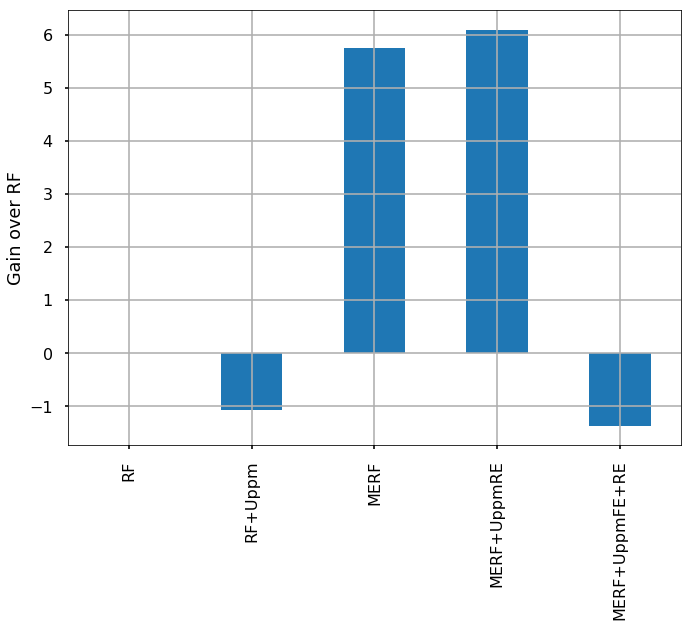

In [81]:
gains.plot(kind='bar', style='b')
plt.grid('on')
plt.ylabel('Gain over RF')

In [42]:
mse_df.to_csv('mse_experiments.csv')

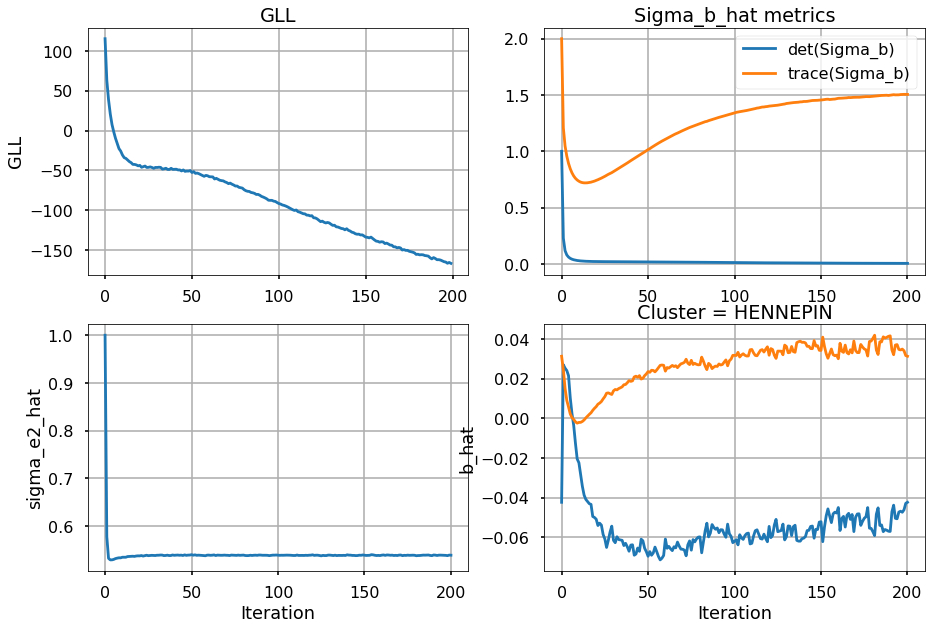

In [82]:
plot_training_stats(mrf_uranium)

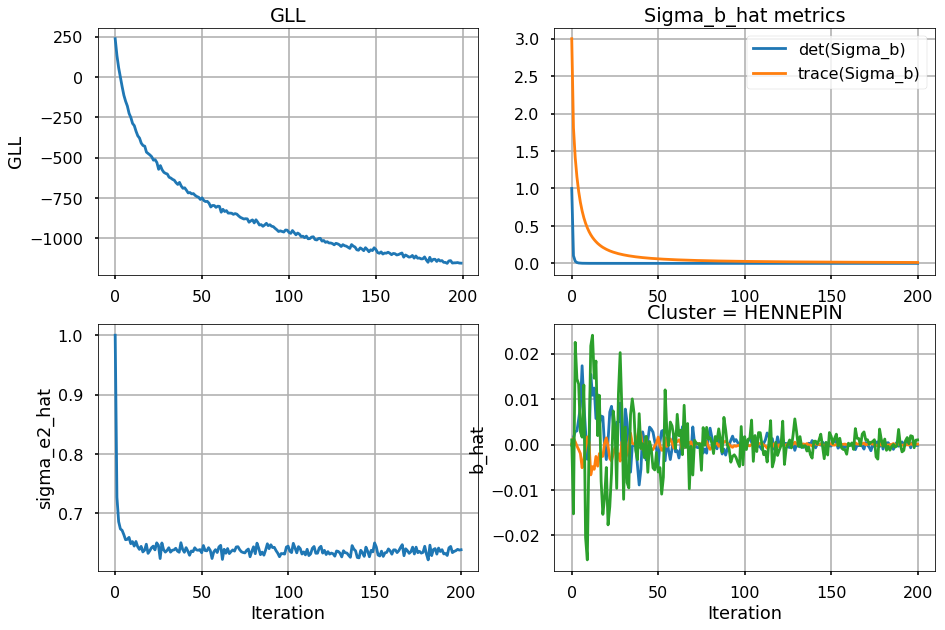

In [83]:
plot_training_stats(mrf_all)

/Users/souravdey/.virtualenvs/merf/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  """Entry point for launching an IPython kernel.


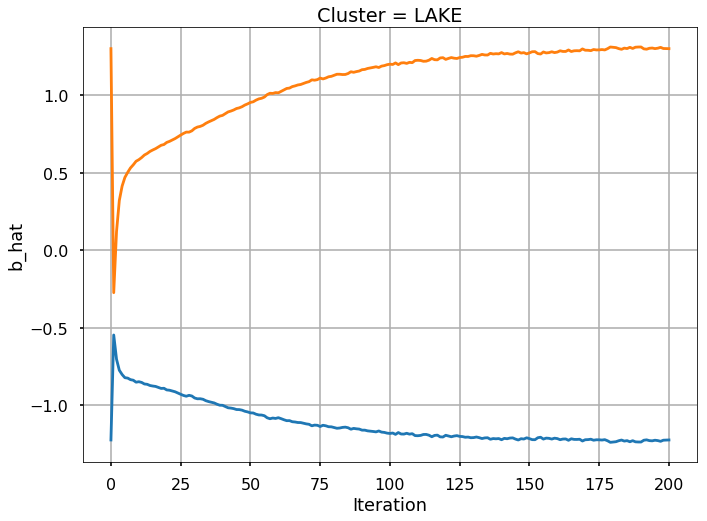

In [84]:
bb = plot_bhat(mrf_uranium, 23)

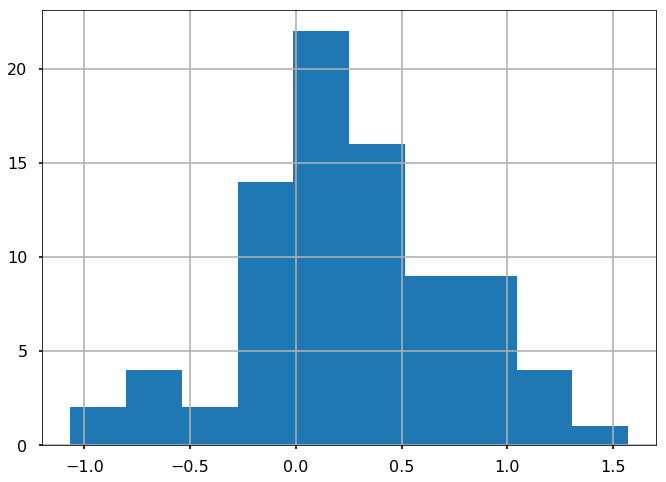

In [85]:
mrf_uranium.b_hat_history[-1][1].hist()